In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(2.0, 8.0)

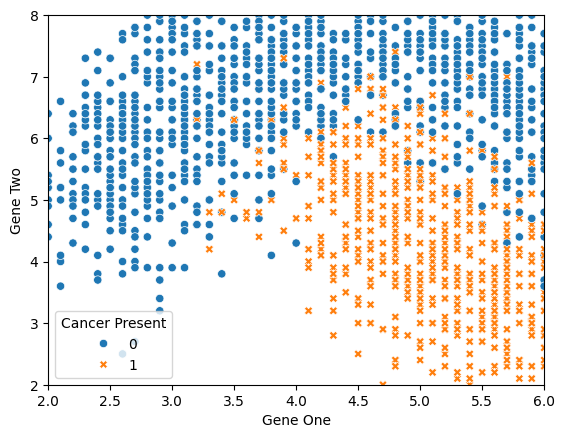

In [10]:
sns.scatterplot(data = df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=1,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(2,8)

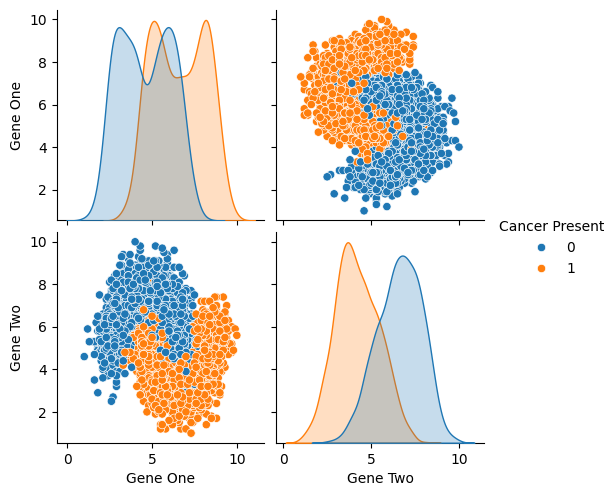

In [13]:
sns.pairplot(data=df,hue='Cancer Present')

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X = df.drop('Cancer Present',axis = 1)

In [17]:
y = df['Cancer Present']

In [18]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)

In [21]:
scaled_X_test = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [30]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_pred = knn_model.predict(scaled_X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]])

In [34]:
len(y_test)

900

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [37]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
1 - accuracy_score(y_test,y_pred)

0.09888888888888892

In [42]:
test_error__rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)

    test_error__rates.append(test_error)

In [44]:
# test_error__rates

Text(0.5, 0, 'K Neighbors')

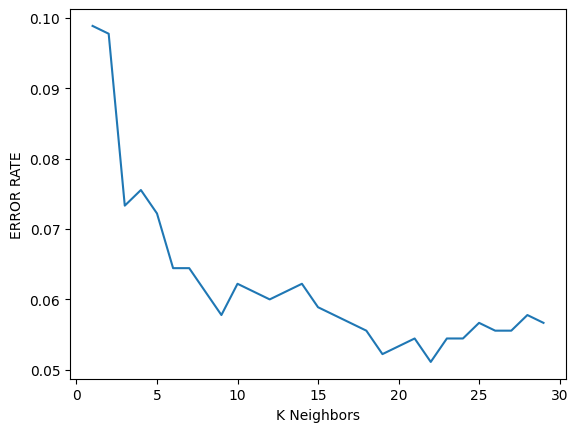

In [45]:
plt.plot(range(1,30),test_error__rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [46]:
# PIPELINE --> GRIDSEARCH CV

In [47]:
scaler = StandardScaler()

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [52]:
operations = [('scaler',scaler),('knn',knn)]

In [51]:
from sklearn.pipeline import Pipeline

In [53]:
pipe = Pipeline(operations)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
K_values = list(range(1,20))

In [57]:
param_grid = {'knn__n_neighbors':K_values}

In [58]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [59]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [60]:
full_cv_classifier.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=16))])>

In [61]:
full_pred = full_cv_classifier.predict(X_test)

In [62]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [63]:
new_patient = [[3.8,6.4]]

In [64]:
full_cv_classifier.predict(new_patient)

C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [65]:
full_cv_classifier.predict_proba(new_patient,)

C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])